In [32]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
from keras.preprocessing import image

In [33]:
p = Path("D:/CB Git/machine-learning-online-2018/Deep-neural-network/Dataset/")
dirs = p.glob("*")

image_data = []
labels = []

label_dict = {"Pikachu":0,"Bulbasaur":1,"Meowth":2}
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Meowth"}

#Optional
image_path = []

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    
    cnt = 0
    print(folder_dir)
    
    #Iterate over the folders and pick all pokemon images
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        
        cnt += 1
        
    print(cnt)

D:\CB Git\machine-learning-online-2018\Deep-neural-network\Dataset\Bulbasaur
173
D:\CB Git\machine-learning-online-2018\Deep-neural-network\Dataset\Meowth
70
D:\CB Git\machine-learning-online-2018\Deep-neural-network\Dataset\Pikachu
199


In [34]:
import numpy as np

In [35]:
print(len(image_data))
print(len(labels))

442
442


In [36]:
print(type(image_data))

<class 'list'>


In [37]:
print(image_data)

[array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 

In [38]:
X = np.array(image_data)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(442, 40, 40, 3)
(442,)


In [39]:
#Draw the pokemons
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.show()

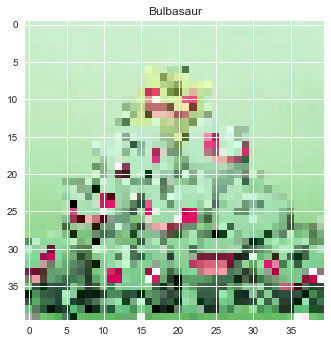

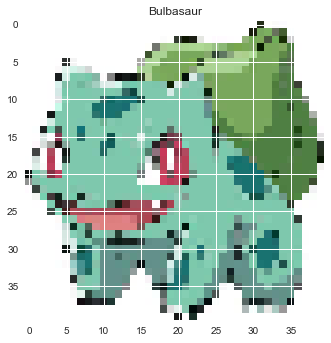

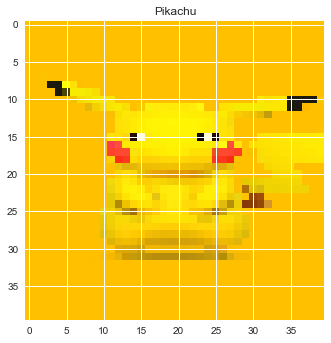

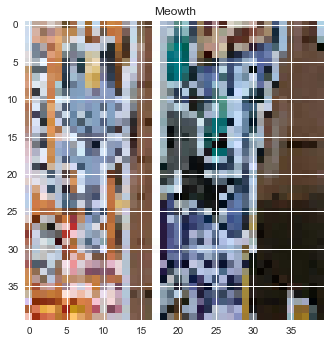

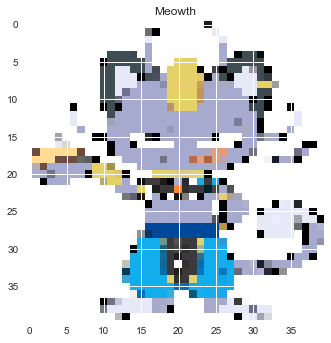

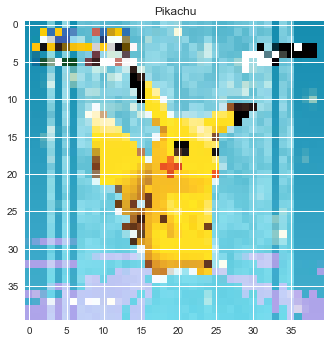

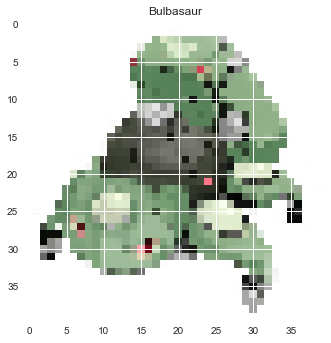

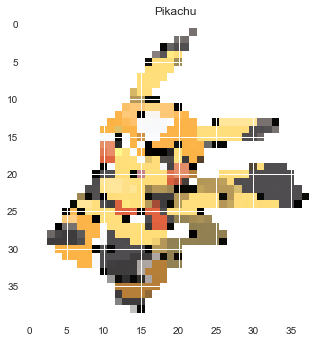

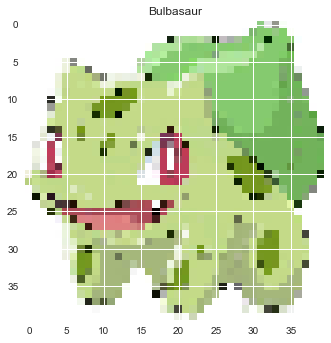

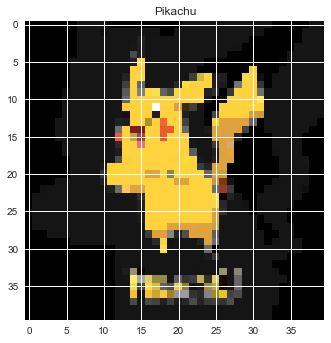

In [40]:
for i in range(10):
    r = np.random.randint(400)
    drawImg(X[r]/255.0,Y[r])
    

In [41]:
import random
random.seed(10)

In [42]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

#Noramlisation
X = X/255.0

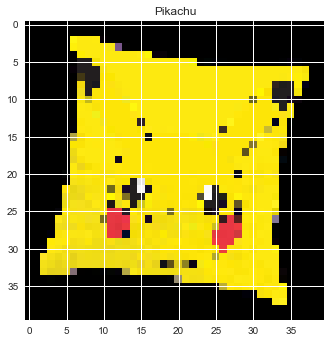

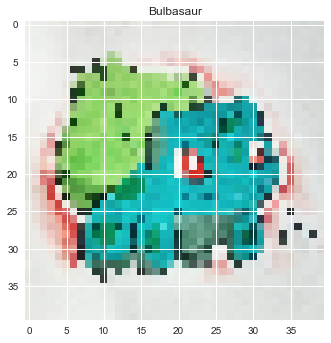

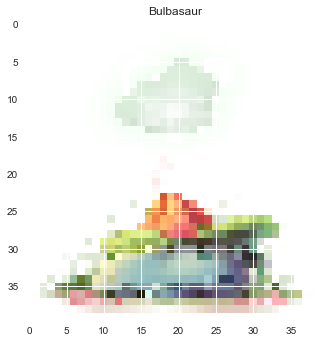

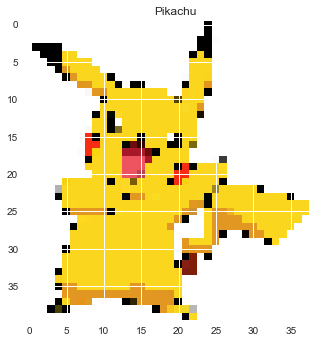

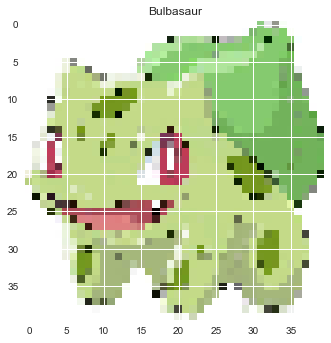

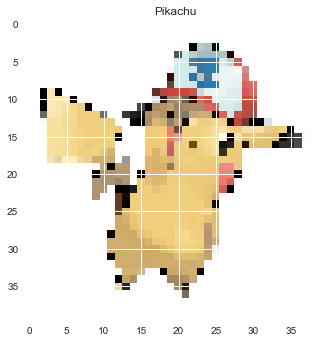

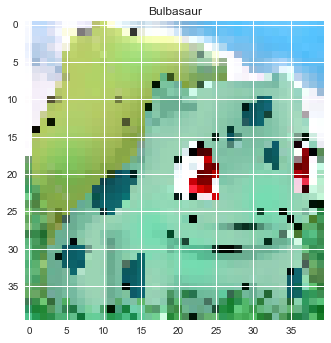

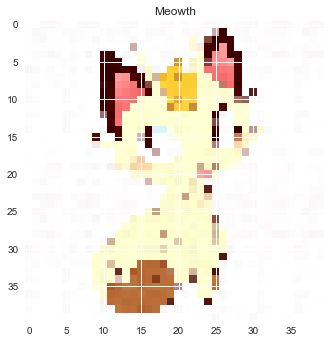

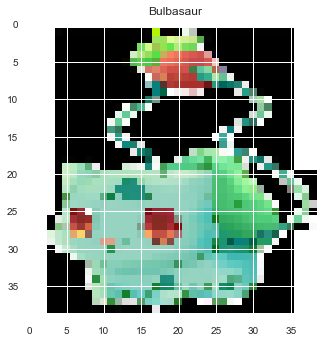

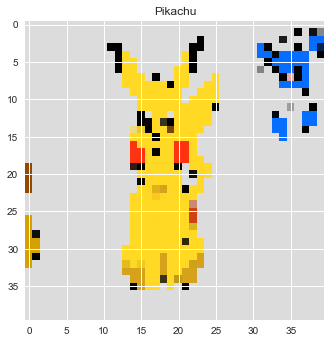

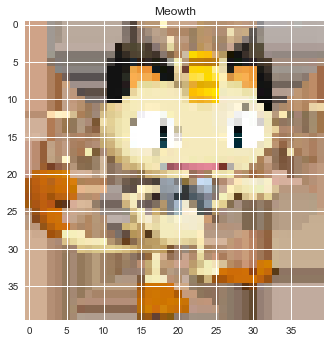

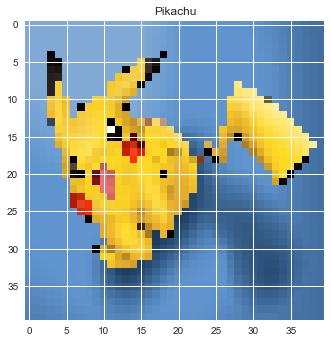

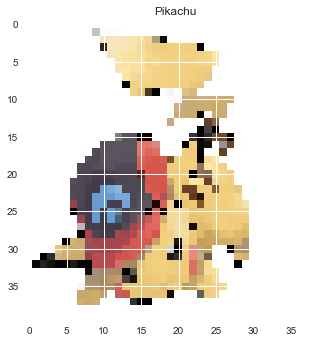

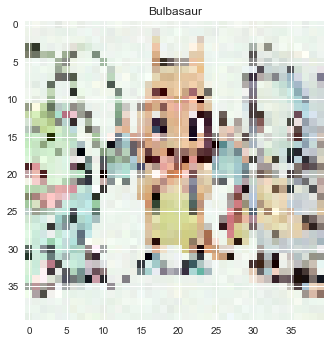

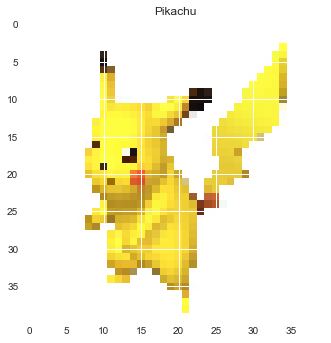

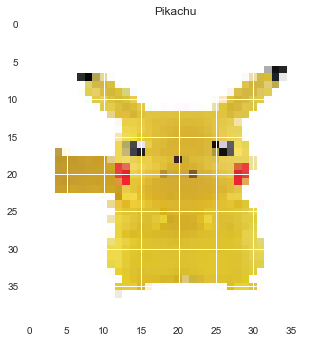

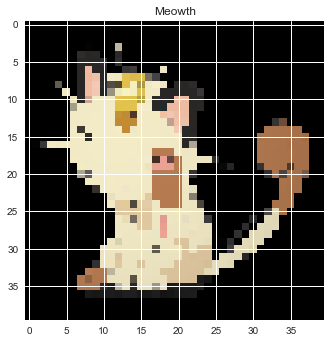

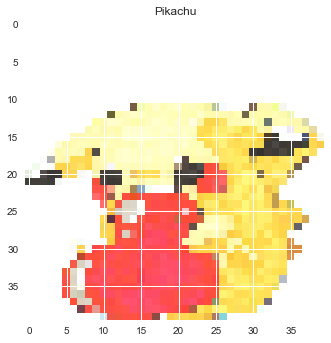

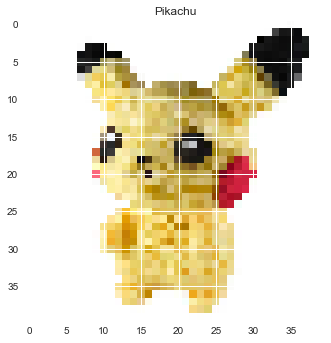

In [43]:
for i in range(1,20):
    drawImg(X[i],Y[i])

In [44]:
#Splitting data

In [45]:
split = int(X.shape[0]*0.8)

X_ = X
Y_ = Y

X = X_[:split,:]
Y = Y_[:split]

X_test = X_[split:,:]
Y_test = Y_[split:]

print(X.shape,Y.shape)
print(X_test.shape,Y_test.shape)

(353, 40, 40, 3) (353,)
(89, 40, 40, 3) (89,)


In [46]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third layer/Output layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self,x):
    
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the model parameters using Gradient Descent
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
            
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [47]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [48]:
def train(X,Y,model,epoch,learning_rate,logs=True):
    training_loss = []
    
    classes = 3
    y_oht = one_hot(Y,classes)
    
    for ix in range(epoch):
        
        Y_ = model.forward(X)
        l = loss(y_oht,Y_)
        model.backward(X,y_oht,learning_rate)
        training_loss.append(l)
        
        if(logs and ix%50==0):
            print("Epoch %d loss %.4f"%(ix,l))
            
    return training_loss

In [49]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [50]:
Y.shape

(353,)

In [51]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

X_test = X_test.reshape(X_test.shape[0],-1)
print(X_test.shape)

(353, 4800)
(89, 4800)


In [52]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3)

In [53]:
l = train(X,Y,model,500,0.0002)

Epoch 0 loss 3.2316
Epoch 50 loss 0.2833
Epoch 100 loss 0.1341
Epoch 150 loss 0.0782
Epoch 200 loss 0.0567
Epoch 250 loss 0.0449
Epoch 300 loss 0.0367
Epoch 350 loss 0.0312
Epoch 400 loss 0.0270
Epoch 450 loss 0.0246


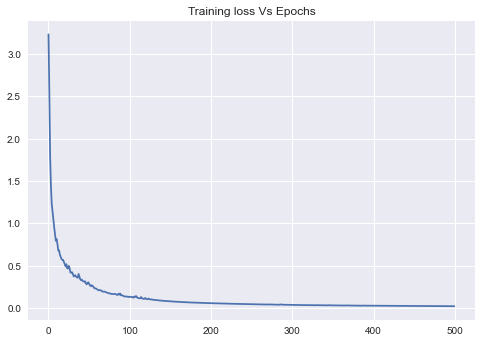

In [54]:
plt.style.use("seaborn")
plt.title("Training loss Vs Epochs")
plt.plot(l)
plt.show()

In [55]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc

print("Train acc is %.4f"%getAccuracy(X,Y,model))
print("Test acc is %.4f"%getAccuracy(X_test,Y_test,model))

Train acc is 0.9972
Test acc is 0.5843


In [56]:
from sklearn.metrics import confusion_matrix
from visualize import plot_confusion_matrix

outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[160   0   0]
 [  0 132   0]
 [  1   0  60]]


Confusion matrix, without normalization
[[160   0   0]
 [  0 132   0]
 [  1   0  60]]


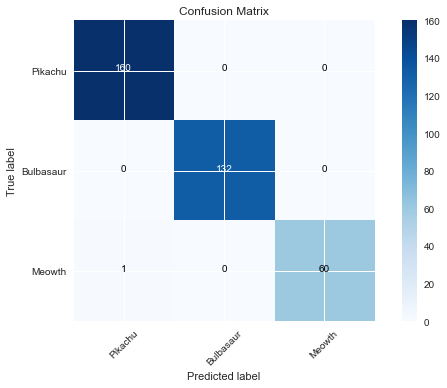

In [57]:
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix")

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       160
           1       1.00      1.00      1.00       132
           2       1.00      0.98      0.99        61

    accuracy                           1.00       353
   macro avg       1.00      0.99      1.00       353
weighted avg       1.00      1.00      1.00       353



In [ ]:
test_outputs = model.predict(X_test)
print(classification_report(test_outputs,Y_test))
cnf_matrix = confusion_matrix(test_outputs,Y_test)
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix Test")

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        32
           1       0.71      0.66      0.68        44
           2       0.30      0.23      0.26        13

    accuracy                           0.58        89
   macro avg       0.51      0.50      0.50        89
weighted avg       0.58      0.58      0.58        89

Confusion matrix, without normalization
[[20  8  4]
 [12 29  3]
 [ 6  4  3]]


In [ ]:
#Visualising Misclassifications

In [ ]:
for i in range(Y.shape[0]):
    if Y[i] != outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))